In [2]:
#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Chargement du jeu de donnée
df = pd.read_csv('../sales_data.csv', encoding='latin1')
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


## Analyse des données

In [5]:
## Affichage des types de données et des valeurs manquantes
print('Types de données et valeurs manquantes :')
print(df.info())


Types de données et valeurs manquantes :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  A

In [6]:
## Affichage des valeurs manquantes
print('Valeurs manquantes :')
print(df.isnull().sum())

Valeurs manquantes :
ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64


In [7]:
## Affichage des statistiques descriptives
print('Statistiques descriptives :')
print(df.describe())

Statistiques descriptives :
        ORDERNUMBER  QUANTITYORDERED    PRICEEACH  ORDERLINENUMBER  \
count   2823.000000      2823.000000  2823.000000      2823.000000   
mean   10258.725115        35.092809    83.658544         6.466171   
std       92.085478         9.741443    20.174277         4.225841   
min    10100.000000         6.000000    26.880000         1.000000   
25%    10180.000000        27.000000    68.860000         3.000000   
50%    10262.000000        35.000000    95.700000         6.000000   
75%    10333.500000        43.000000   100.000000         9.000000   
max    10425.000000        97.000000   100.000000        18.000000   

              SALES       QTR_ID     MONTH_ID     YEAR_ID         MSRP  
count   2823.000000  2823.000000  2823.000000  2823.00000  2823.000000  
mean    3553.889072     2.717676     7.092455  2003.81509   100.715551  
std     1841.865106     1.203878     3.656633     0.69967    40.187912  
min      482.130000     1.000000     1.000000  20

## Nettoyage & Transformation du dataset

In [8]:
# Nettoyage des noms de colonnes :
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

df.head()

,ordernumber,quantityordered,priceeach,orderlinenumber,sales,orderdate,status,qtr_id,month_id,year_id,...,addressline1,addressline2,city,state,postalcode,country,territory,contactlastname,contactfirstname,dealsize
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [9]:
# Conversion des dates :
df['orderdate'] = pd.to_datetime(df['orderdate'], errors='coerce')
# Suppression des doublons et des lignes avec des données critiques manquantes :
df = df.drop_duplicates()
df = df.dropna(subset=['orderdate', 'sales', 'quantityordered', 'priceeach'])
# Création d’une colonne total_price :
df['total_price'] = df['quantityordered'] * df['priceeach']

df[[ 'orderdate', 'quantityordered', 'priceeach', 'total_price', 'sales']].head()


,orderdate,quantityordered,priceeach,total_price,sales
0,2003-02-24,30,95.70,2871.00,2871.00
1,2003-05-07,34,81.35,2765.90,2765.90
2,2003-07-01,41,94.74,3884.34,3884.34
3,2003-08-25,45,83.26,3746.70,3746.70
4,2003-10-10,49,100.00,4900.00,5205.27


In [10]:
# Calcule du tva
df['tva_estime'] = df['sales'] - df['total_price']

# Suppression des valeurs proches de zéro (par exemple < 1e-10)
df['tva_estime'] = df['tva_estime'].apply(lambda x: 0 if abs(x) < 1e-10 else x)
df['tva_estime'] = df['tva_estime'].round(2)

df['tva_estime'].head(10)

0      0.00
1      0.00
2      0.00
3      0.00
4    305.27
5      0.00
6      0.00
7    712.32
8      0.00
9    608.44
Name: tva_estime, dtype: float64

In [11]:
# Sélection des colonnes importantes pour l’analyse :
colonnes_utiles = [
    'ordernumber', 'orderdate', 'status', 'productcode', 'productline',
    'quantityordered', 'priceeach', 'total_price', 'sales', 'tva_estime', 'country', 'dealsize'
]
df_clean = df[colonnes_utiles]

In [12]:
# Ajout de la colonne mois
df_clean['month'] = df_clean['orderdate'].dt.month

In [13]:
# sauvegarder du jeu de données propre.
df_clean.to_csv('sales_data_clean.csv', index=False)
df_clean.head()

,ordernumber,orderdate,status,productcode,productline,quantityordered,priceeach,total_price,sales,tva_estime,country,dealsize,month
0,10107,2003-02-24,Shipped,S10_1678,Motorcycles,30,95.70,2871.00,2871.00,0.00,USA,Small,2
1,10121,2003-05-07,Shipped,S10_1678,Motorcycles,34,81.35,2765.90,2765.90,0.00,France,Small,5
2,10134,2003-07-01,Shipped,S10_1678,Motorcycles,41,94.74,3884.34,3884.34,0.00,France,Medium,7
3,10145,2003-08-25,Shipped,S10_1678,Motorcycles,45,83.26,3746.70,3746.70,0.00,USA,Medium,8
4,10159,2003-10-10,Shipped,S10_1678,Motorcycles,49,100.00,4900.00,5205.27,305.27,USA,Medium,10


# Analyse des caractéristiques des données avec les fonctions de Pandas et Numpy

In [20]:
# Types des colonnes, valeurs non nulles
print(df_clean.info() )          
# Statistiques sur les colonnes numériques
df_clean.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ordernumber      2823 non-null   int64         
 1   orderdate        2823 non-null   datetime64[ns]
 2   status           2823 non-null   object        
 3   productcode      2823 non-null   object        
 4   productline      2823 non-null   object        
 5   quantityordered  2823 non-null   int64         
 6   priceeach        2823 non-null   float64       
 7   total_price      2823 non-null   float64       
 8   sales            2823 non-null   float64       
 9   tva_estime       2823 non-null   float64       
 10  country          2823 non-null   object        
 11  dealsize         2823 non-null   object        
 12  month            2823 non-null   int32         
dtypes: datetime64[ns](1), float64(4), int32(1), int64(2), object(5)
memory usage: 275.8+ KB
None


,ordernumber,orderdate,quantityordered,priceeach,total_price,sales,tva_estime,month
count,2823.000000,2823,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000
mean,10258.725115,2004-05-11 00:16:49.989373056,35.092809,83.658544,2936.906408,3553.889072,616.982664,7.092455
min,10100.000000,2003-01-06 00:00:00,6.000000,26.880000,482.130000,482.130000,0.000000,1.000000
25%,10180.000000,2003-11-06 12:00:00,27.000000,68.860000,2100.000000,2203.430000,0.000000,4.000000
50%,10262.000000,2004-06-15 00:00:00,35.000000,95.700000,2800.000000,3184.800000,0.000000,8.000000
75%,10333.500000,2004-11-17 12:00:00,43.000000,100.000000,3726.810000,4508.000000,925.180000,11.000000
max,10425.000000,2005-05-31 00:00:00,97.000000,100.000000,9048.160000,14082.800000,7536.500000,12.000000
std,92.085478,NaN,9.741443,20.174277,1105.644284,1841.865106,1047.728887,3.656633


In [21]:
# Statistiques sur les colonnes catégorielles
df_clean.describe(include='object')

,status,productcode,productline,country,dealsize
count,2823,2823,2823,2823,2823
unique,6,109,7,19,3
top,Shipped,S18_3232,Classic Cars,USA,Medium
freq,2617,52,967,1004,1384


In [ ]:
# Analyse univariée (une colonne à la fois)
print(df_clean['sales'].mean()) 
print(df_clean['sales'].median())
# Écart-type
print(df_clean['sales'].std())    
# Valeur maximale
print(df_clean['sales'].max())
# Valeur minimale
print(df_clean['sales'].min())   
# Asymétrie permet de savoir si la distribution est équilibrée ou non
print(df_clean['sales'].skew())     
# Aplatissement permet de savoir si la distribution est équilibrée ou non 
print(df_clean['sales'].kurt())     
# Analyse bivariée (deux colonnes)


3553.889071909316
3184.8
1841.865105740182
14082.8
482.13
1.161076000881289
1.7926764690198267
Corrélation entre les ventes et le montant total des ventes : 0.8635578163829537


In [26]:
# Ananlyse univariée des colonnes catégorielles :
print(df_clean['status'].value_counts())
print(df_clean['productline'].value_counts(normalize=True))  # Proportions
print(df_clean['country'].value_counts()) 
print(df_clean['dealsize'].value_counts()) 
print(df_clean['productcode'].value_counts())


status
Shipped       2617
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: count, dtype: int64
productline
Classic Cars        0.342543
Vintage Cars        0.215019
Motorcycles         0.117251
Planes              0.108395
Trucks and Buses    0.106624
Ships               0.082891
Trains              0.027276
Name: proportion, dtype: float64
country
USA            1004
Spain           342
France          314
Australia       185
UK              144
Italy           113
Finland          92
Norway           85
Singapore        79
Canada           70
Denmark          63
Germany          62
Sweden           57
Austria          55
Japan            52
Belgium          33
Switzerland      31
Philippines      26
Ireland          16
Name: count, dtype: int64
dealsize
Medium    1384
Small     1282
Large      157
Name: count, dtype: int64
productcode
S18_3232    52
S10_1949    28
S24_1444    28
S10_4962    28
S24_2840    28
            ..
S18_1749 

In [28]:
# Analyse bivariée (deux colonnes)
# Corrélation entre les ventes et le montant total des commandes
print('Corrélation entre les ventes et le montant total des commandes : ', df_clean['sales'].corr(df_clean['total_price']))

# Moyenne des ventes par produit
print('Moyenne des ventes par produit :')
print(df_clean.groupby('productline')['sales'].mean())
# Moyenne des ventes par pays
print('Moyenne des ventes par pays :')
print(df_clean.groupby('country')['sales'].mean())
# Total des ventes par pays :
print('Total des ventes par pays :')
print(df_clean.groupby('country')['sales'].sum().sort_values(ascending=False))
# Quantité moyenne par type de produit :
print('Quantité moyenne par type de produit :')
print(df_clean.groupby('productline')['quantityordered'].mean())
# Nombre de commandes par statut :
print('Nombre de commandes par statut :')
print(df_clean['status'].value_counts())
# Nombre de commandes par pays :
print('Nombre de commandes par pays :')
print(df_clean.groupby('country')['ordernumber'].count().sort_values(ascending=False))


Corrélation entre les ventes et le montant total des commandes :  0.8635578163829537
Moyenne des ventes par produit :
productline
Classic Cars        4053.377104
Motorcycles         3523.831843
Planes              3186.286176
Ships               3053.150128
Trains              2938.226883
Trucks and Buses    3746.810100
Vintage Cars        3135.339110
Name: sales, dtype: float64
Moyenne des ventes par pays :
country
Australia      3408.773514
Austria        3673.864182
Belgium        3285.230909
Canada         3201.122286
Denmark        3899.002381
Finland        3582.412065
France         3537.950701
Germany        3556.001452
Ireland        3609.776875
Italy          3315.701858
Japan          3618.611731
Norway         3617.220000
Philippines    3615.989615
Singapore      3651.752025
Spain          3554.640117
Sweden         3684.459825
Switzerland    3797.211613
UK             3325.558750
USA            3613.528715
Name: sales, dtype: float64
Total des ventes par pays :
country
USA

## Analyse temporelle

In [ ]:
# Extraction des mois et années :
df_clean['month'] = df_clean['orderdate'].dt.month
df_clean['year'] = df_clean['orderdate'].dt.year
# Analyse des ventes mensuelles :
print('Analyse des ventes mensuelles :')    
print(df_clean.groupby(['year', 'month'])['sales'].sum().reset_index())

# Analyse des ventes annuelles :
print('Analyse des ventes annuelles :')
print(df_clean.groupby('year')['sales'].sum().reset_index())

# Analyse des ventes mensuelles par pays :
print('Analyse des ventes mensuelles par pays :')
print(df_clean.groupby(['year', 'month', 'country'])['sales'].sum().reset_index())

# Analyse des ventes annuelles par pays :
print('Analyse des ventes annuelles par pays :')
print(df_clean.groupby(['year', 'country'])['sales'].sum().reset_index())

# Analyse des ventes mensuelles par produit :
print('Analyse des ventes mensuelles par produit :')
print(df_clean.groupby(['year', 'month', 'productline'])['sales'].sum().reset_index())

# Analyse des ventes annuelles par produit :
print('Analyse des ventes annuelles par produit :')
print(df_clean.groupby(['year', 'productline'])['sales'].sum().reset_index())

# Analyse des ventes mensuelles par statut :
print('Analyse des ventes mensuelles par statut :')
print(df_clean.groupby(['year', 'month', 'status'])['sales'].sum().reset_index())




Analyse des ventes mensuelles :
    year  month       sales
0   2003      1   129753.60
1   2003      2   140836.19
2   2003      3   174504.90
3   2003      4   201609.55
4   2003      5   192673.11
5   2003      6   168082.56
6   2003      7   187731.88
7   2003      8   197809.30
8   2003      9   263973.36
9   2003     10   568290.97
10  2003     11  1029837.66
11  2003     12   261876.46
12  2004      1   316577.42
13  2004      2   311419.53
14  2004      3   205733.73
15  2004      4   206148.12
16  2004      5   273438.39
17  2004      6   286674.22
18  2004      7   327144.09
19  2004      8   461501.27
20  2004      9   320750.91
21  2004     10   552924.25
22  2004     11  1089048.01
23  2004     12   372802.66
24  2005      1   339543.42
25  2005      2   358186.18
26  2005      3   374262.76
27  2005      4   261633.29
28  2005      5   457861.06
Analyse des ventes annuelles :
   year       sales
0  2003  3516979.54
1  2004  4724162.60
2  2005  1791486.71
Analyse des vente

In [33]:
# Analyse multivariée (plusieurs colonnes)
# Analyse des ventes par produit et par pays
print('Analyse des ventes par produit et par pays :')
print(df_clean.groupby(['productline', 'country']).agg({'sales': 'sum'}).reset_index())

# Analyse des ventes par produit et par pays et par mois
print('Analyse des ventes par produit et par pays et par mois :')
print(df_clean.groupby(['productline', 'country', 'month']).agg({'sales': 'sum'}).reset_index())

# Analyse des ventes par produit et par pays et par année
print('Analyse des ventes par produit et par pays et par année :')
print(df_clean.groupby(['productline', 'country', 'year']).agg({'sales': 'sum'}).reset_index())


Analyse des ventes par produit et par pays :
      productline    country      sales
0    Classic Cars  Australia  193085.54
1    Classic Cars    Austria  101459.47
2    Classic Cars    Belgium   20136.96
3    Classic Cars     Canada   61623.22
4    Classic Cars    Denmark  157182.48
..            ...        ...        ...
111  Vintage Cars  Singapore   34960.46
112  Vintage Cars      Spain  229514.51
113  Vintage Cars     Sweden   33804.46
114  Vintage Cars         UK  123798.74
115  Vintage Cars        USA  757755.90

[116 rows x 3 columns]
Analyse des ventes par produit et par pays et par mois :
      productline    country  month      sales
0    Classic Cars  Australia      1    3832.00
1    Classic Cars  Australia      3    4151.86
2    Classic Cars  Australia      5   23425.66
3    Classic Cars  Australia      7   25590.29
4    Classic Cars  Australia      9   52552.48
..            ...        ...    ...        ...
403  Vintage Cars        USA      8   30978.07
404  Vintage Cars 

## Visualisation des données

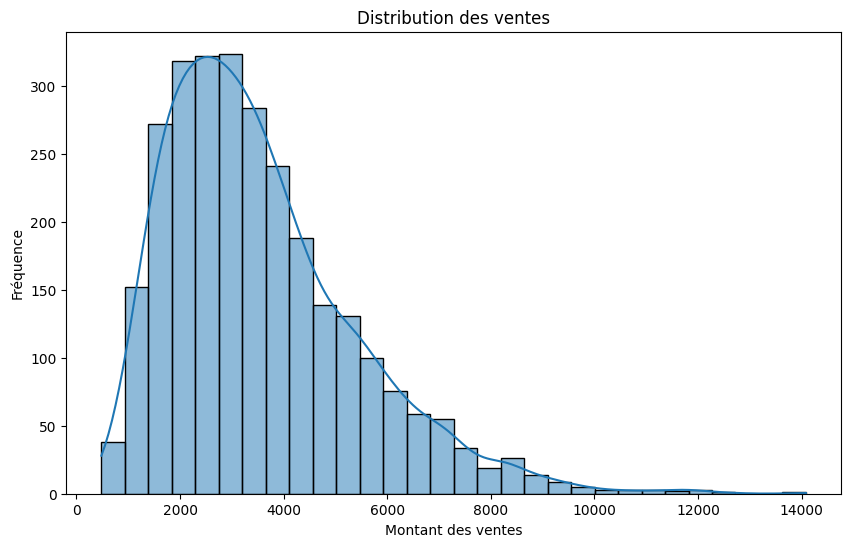

In [37]:
# 1. Histogramme des ventes
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['sales'], bins=30, kde=True)
plt.title('Distribution des ventes')
plt.xlabel('Montant des ventes')
plt.ylabel('Fréquence ')
plt.show()

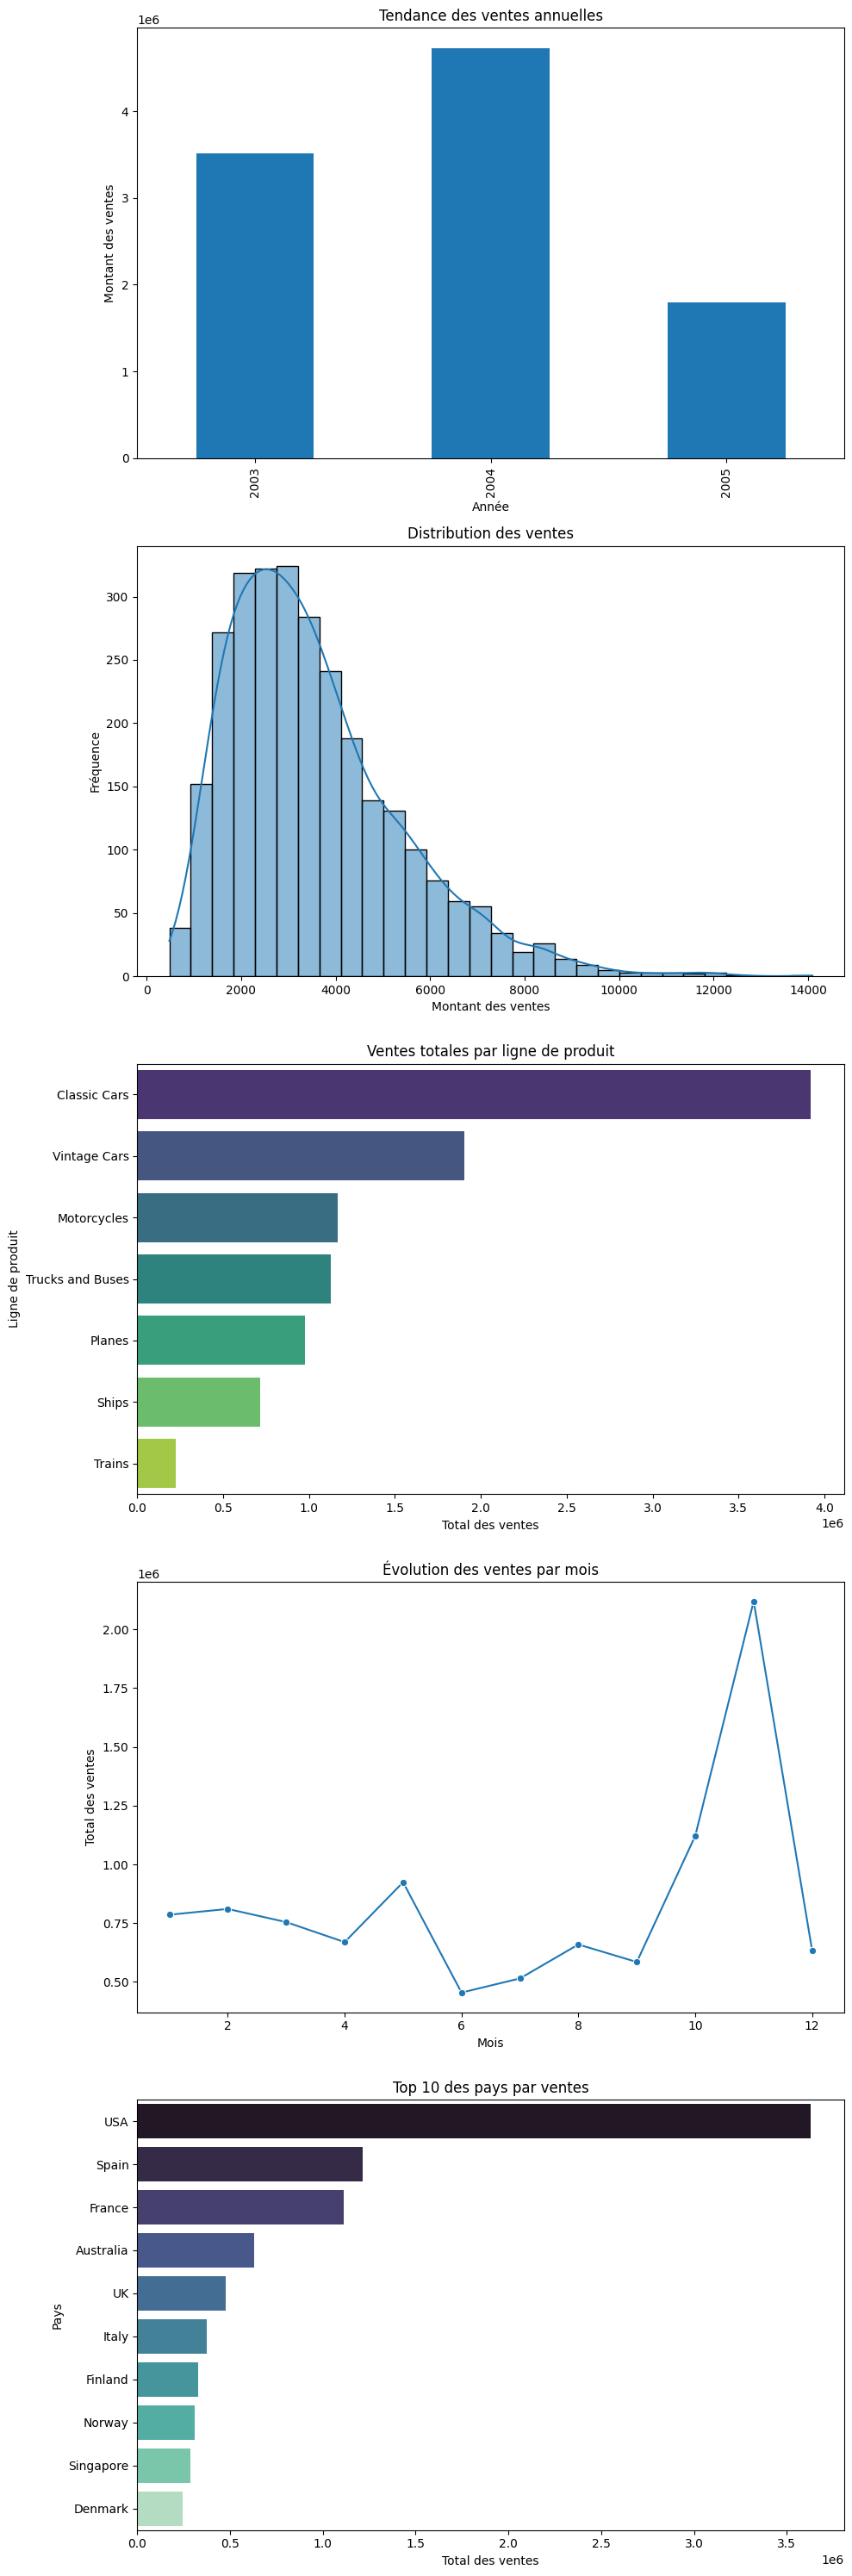

In [41]:
fig, ax = plt.subplots(5, 1, figsize=(10, 30))

# Tendance des ventes annuelles :
df_clean.groupby('year')['sales'].sum().plot(kind='bar', ax=ax[0])
ax[0].set_title('Tendance des ventes annuelles')
ax[0].set_xlabel('Année')
ax[0].set_ylabel('Montant des ventes')

# 1. Histogramme des ventes
sns.histplot(df_clean['sales'], bins=30, kde=True, ax=ax[1])
ax[1].set_title('Distribution des ventes')
ax[1].set_xlabel('Montant des ventes')
ax[1].set_ylabel('Fréquence')

# 2. Ventes totales par ligne de produit
product_sales = df_clean.groupby('productline')['sales'].sum().sort_values(ascending=False)
sns.barplot(x=product_sales.values, y=product_sales.index, palette='viridis', ax=ax[2])
ax[2].set_title('Ventes totales par ligne de produit')
ax[2].set_xlabel('Total des ventes')
ax[2].set_ylabel('Ligne de produit')

# 3. Courbe des ventes par mois
monthly_sales = df_clean.groupby('month')['sales'].sum()
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o', ax=ax[3])
ax[3].set_title('Évolution des ventes par mois')
ax[3].set_xlabel('Mois')
ax[3].set_ylabel('Total des ventes')


# 4. Top 10 des pays en termes de ventes
top_countries = df_clean.groupby('country')['sales'].sum().sort_values(ascending=False).head(10)

sns.barplot(x=top_countries.values, y=top_countries.index, palette='mako', ax=ax[4])
ax[4].set_title('Top 10 des pays par ventes')
ax[4].set_xlabel('Total des ventes')
ax[4].set_ylabel('Pays')



plt.tight_layout()
plt.show()

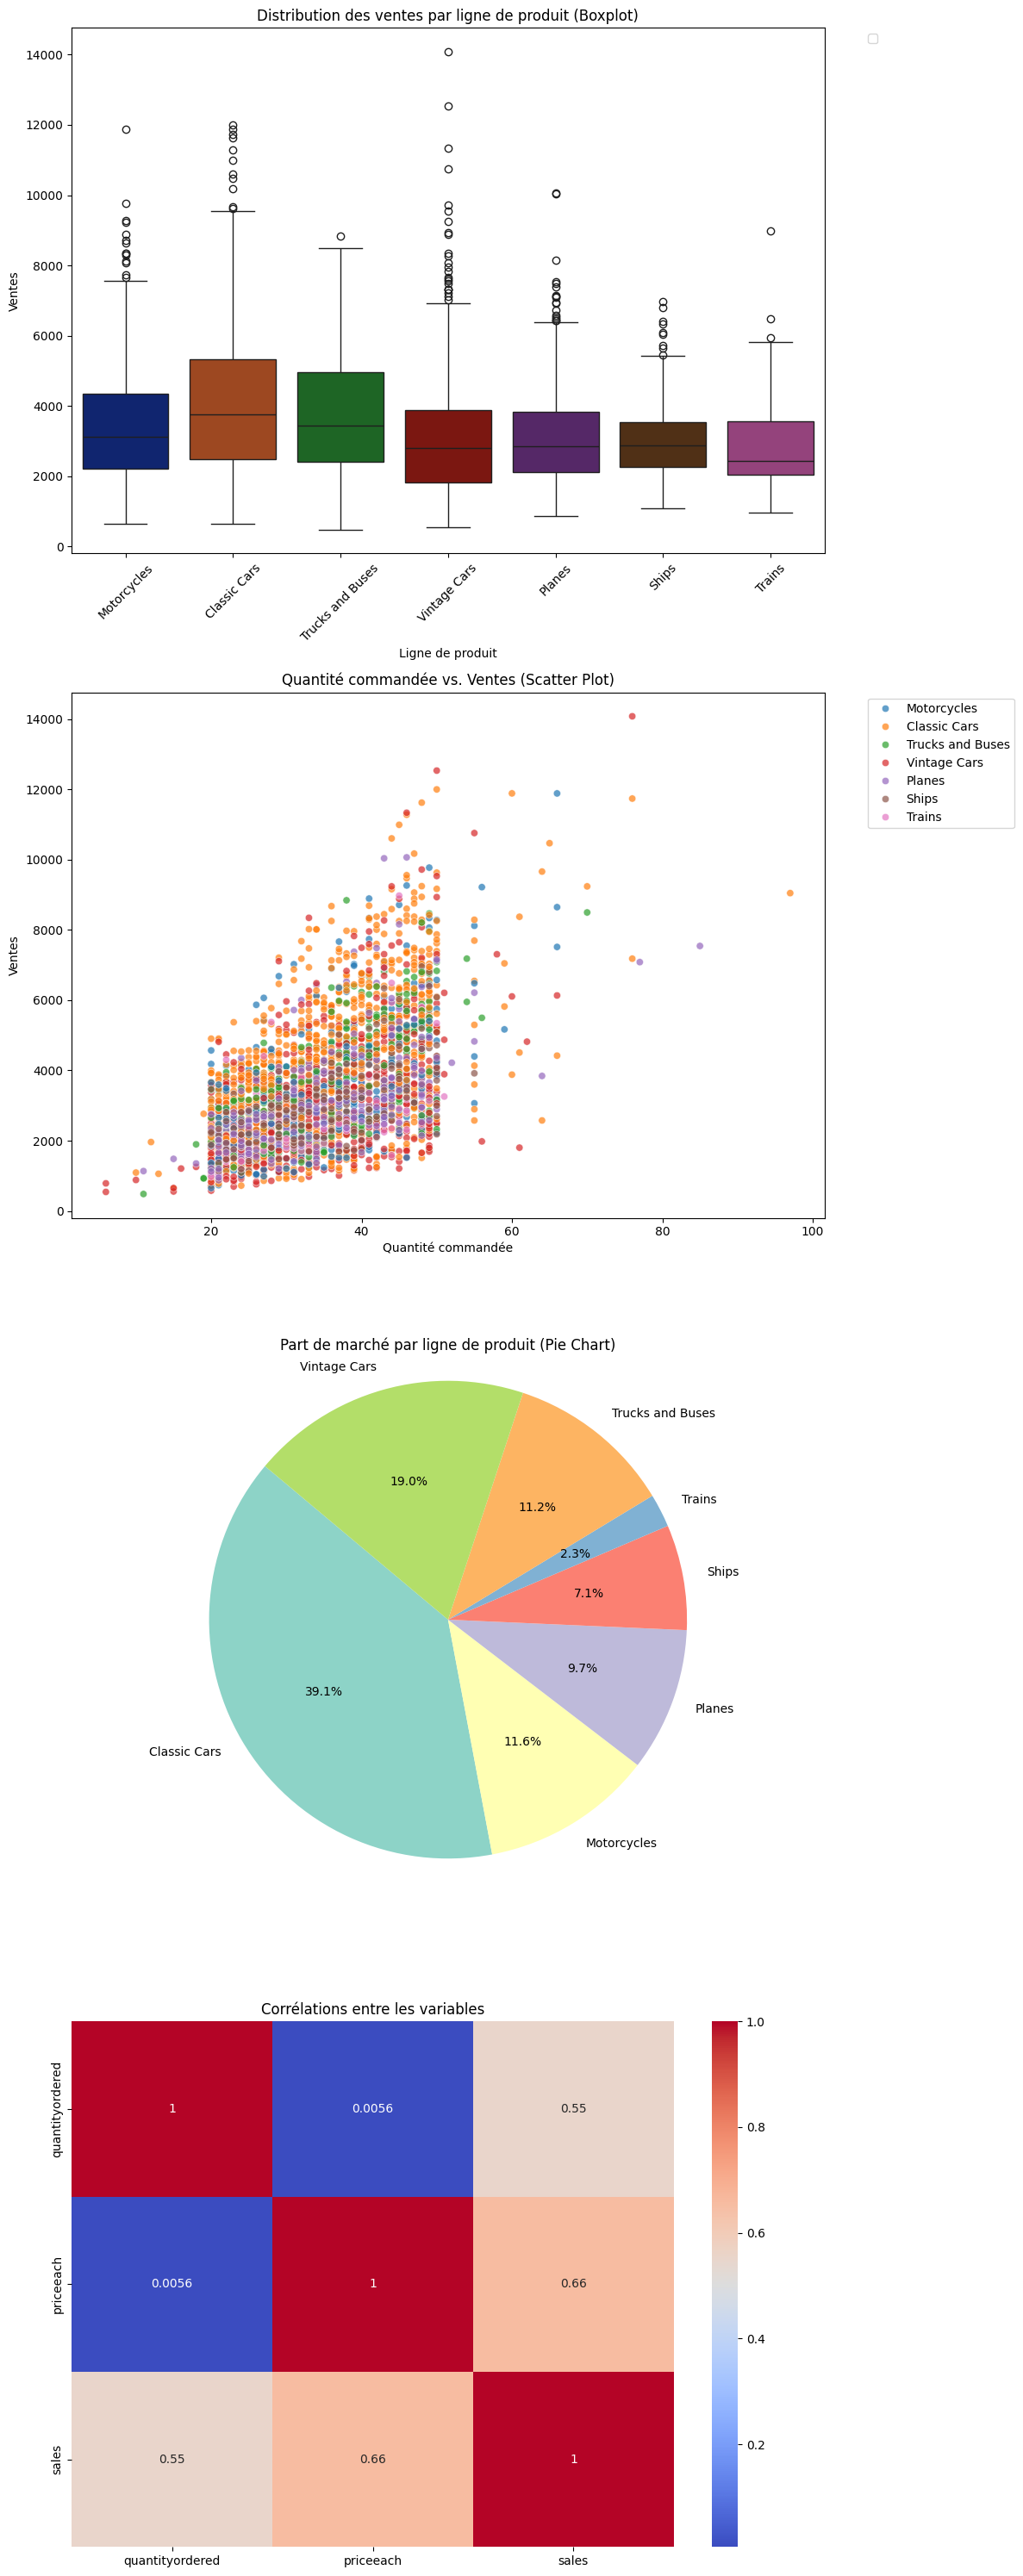

In [50]:
fig, ax = plt.subplots(4, 1, figsize=(12, 30))

# 4. Boxplot des ventes par ligne de produit
#couleur foncé pour chaque ligne de produit 
colors = sns.color_palette('dark')
sns.boxplot(x='productline', y='sales', data=df_clean, ax=ax[0], palette=colors)
# Ajoute une légende pour chaque ligne de produit
ax[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax[0].set_title("Distribution des ventes par ligne de produit (Boxplot)")
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
ax[0].set_xlabel('Ligne de produit')
ax[0].set_ylabel('Ventes')


# 5. Scatter plot entre quantité commandée et ventes
sns.scatterplot(data=df_clean, x='quantityordered', y='sales', hue='productline', alpha=0.7, ax=ax[1])
ax[1].set_title("Quantité commandée vs. Ventes (Scatter Plot)")
ax[1].set_xlabel('Quantité commandée')
ax[1].set_ylabel('Ventes')
ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 6. Pie chart des parts de marché par ligne de produit
product_share = df_clean.groupby('productline')['sales'].sum()
ax[2].pie(product_share, labels=product_share.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3'))
ax[2].set_title('Part de marché par ligne de produit (Pie Chart)')
ax[2].axis('equal')

#  Corrélations entre variables numériques
correlation_matrix = df_clean[['quantityordered', 'priceeach', 'sales']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=ax[3])
ax[3].set_title("Corrélations entre les variables")


plt.tight_layout()
plt.show()


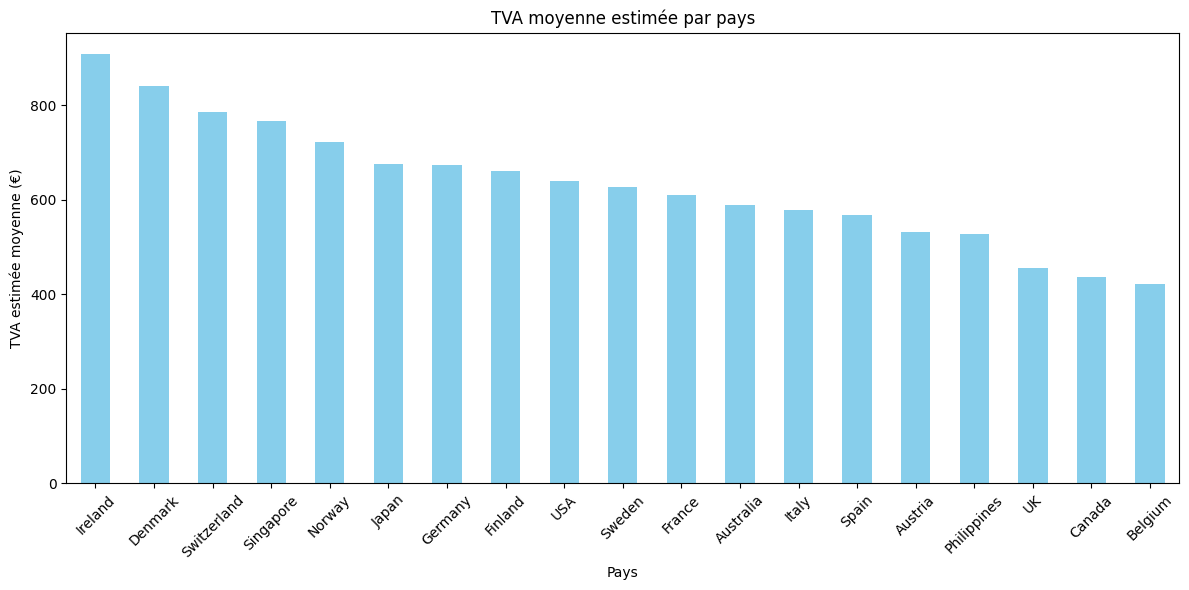

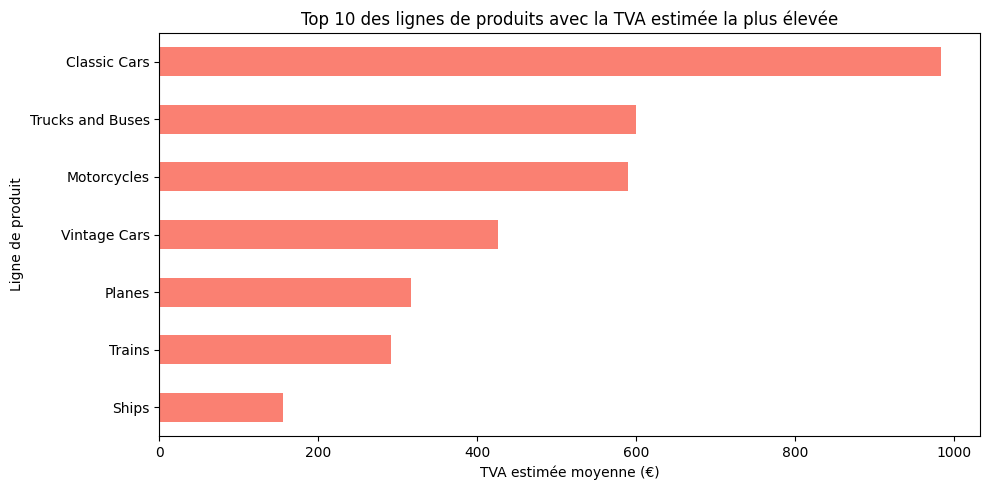

In [18]:
# Moyenne de la TVA estimée par pays
df_country_tva = df.groupby('country')['tva_estime'].mean().sort_values(ascending=False)

# Graphique en barres
plt.figure(figsize=(12, 6))
df_country_tva.plot(kind='bar', color='skyblue')
plt.title("TVA moyenne estimée par pays")
plt.ylabel("TVA estimée moyenne (€)")
plt.xlabel("Pays")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Moyenne de la TVA estimée par produit
df_product_tva = df.groupby('productline')['tva_estime'].mean().sort_values(ascending=False).head(10)

# Graphique en barres
plt.figure(figsize=(10, 5))
df_product_tva.plot(kind='barh', color='salmon')
plt.title("Top 10 des lignes de produits avec la TVA estimée la plus élevée")
plt.xlabel("TVA estimée moyenne (€)")
plt.ylabel("Ligne de produit")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

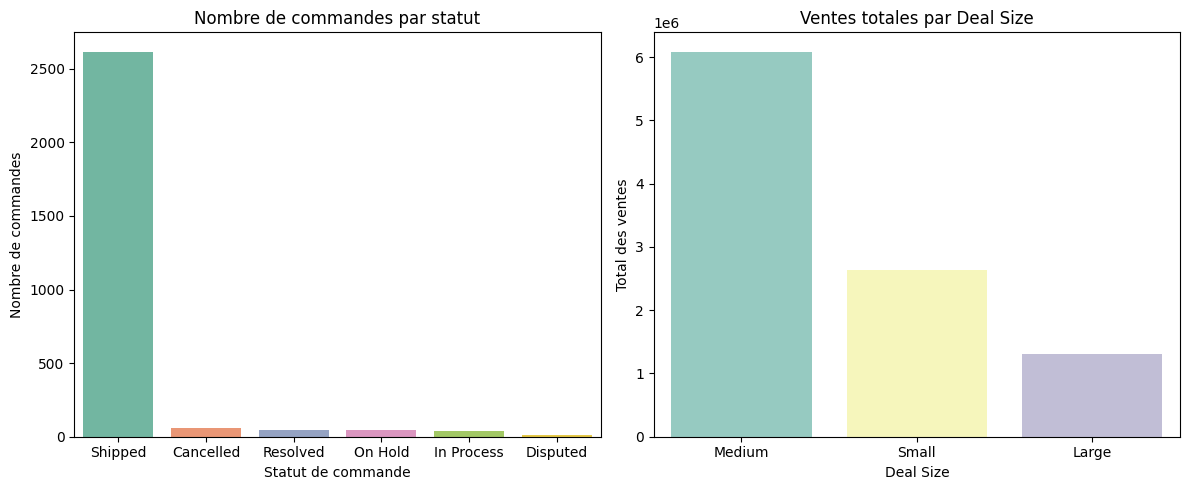

In [19]:
# 1. Répartition des commandes par statut
order_status_counts = df_clean['status'].value_counts()

# 2. Répartition des ventes selon le statut
sales_by_status = df_clean.groupby('status')['sales'].sum().sort_values(ascending=False)

# 3. Répartition des ventes selon le deal size
sales_by_dealsize = df_clean.groupby('dealsize')['sales'].sum().sort_values(ascending=False)

# Graphiques
plt.figure(figsize=(12, 5))

# Graphe 1: Nombre de commandes par statut
plt.subplot(1, 2, 1)
sns.barplot(x=order_status_counts.index, y=order_status_counts.values, palette='Set2')
plt.title("Nombre de commandes par statut")
plt.xlabel("Statut de commande")
plt.ylabel("Nombre de commandes")

# Graphe 2: Ventes par deal size
plt.subplot(1, 2, 2)
sns.barplot(x=sales_by_dealsize.index, y=sales_by_dealsize.values, palette='Set3')
plt.title("Ventes totales par Deal Size")
plt.xlabel("Deal Size")
plt.ylabel("Total des ventes")

plt.tight_layout()
plt.show()